#Case Study on Unsupervised Learning

**What is Unsupervised Learning?**

Unsupervised learning is a machine learning approach where the model explores patterns in unlabeled data. Unlike supervised learning (which learns from input-output pairs), unsupervised learning works without knowing the actual answers.

The goal is to uncover the hidden structure in data — such as grouping similar items together (clustering) or simplifying high-dimensional data (dimensionality reduction).

Two common unsupervised techniques:

 * Clustering (e.g., KMeans, DBSCAN)

 * Dimensionality Reduction (e.g., PCA)

**Why Use Unsupervised Learning on Wholesale Customer Data**?

The wholesale customer dataset contains information about customer spending across different product categories (like Fresh, Milk, Grocery, etc.), but it doesn’t include labels or categories indicating what kind of customer each one is (e.g., retailer, hotel, individual).

Because there are no predefined classes, we can't use supervised learning. Instead, unsupervised learning is useful here to:

 * Discover natural groupings of customers based on their purchasing behavior

 * Identify distinct customer segments, such as high-volume buyers, budget shoppers, or category-specific consumers

 * Support business decisions, like targeted marketing, personalized offers, or supply chain planning

By using clustering (KMeans, DBSCAN), we can uncover patterns and structure in the data — helping businesses understand their customers without needing labeled data.



In [65]:
#importing necessary libraraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
#reading the dataset
df = pd.read_csv("/content/Wholesale customers data.csv")


In [67]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [68]:
#the first five rows of the dataframe
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [69]:
#getting the frequencies of values present in region column
df['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


In [70]:
#doing the same with channel column
df['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [71]:
#displaying the columns
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [72]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [73]:
#getting the numerical statistics of each column
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 1. EDA

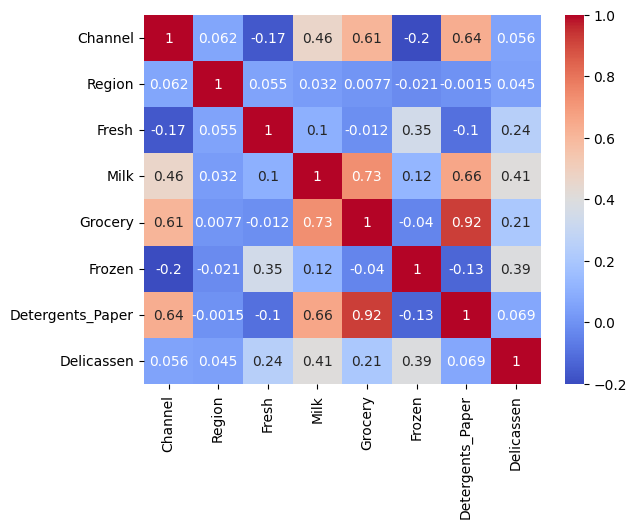

In [74]:
# correlation matrix

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

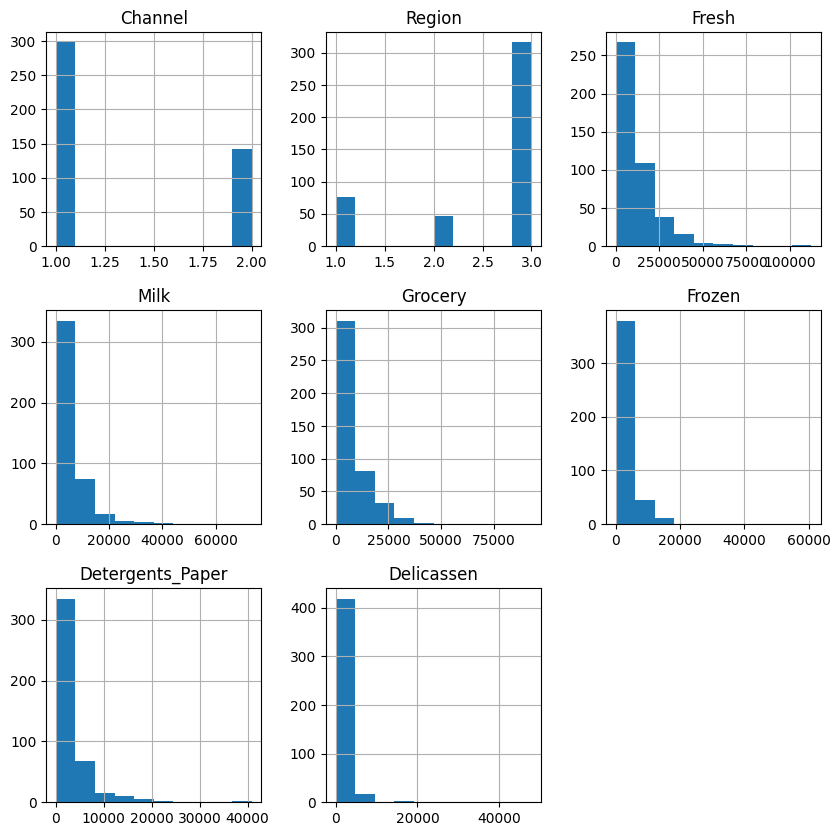

In [75]:
#distribution of each column in histogram

df.hist(figsize=(10,10))
plt.show()

## 2. Data Preprocessing

In [76]:
#for later use
data=df.copy()

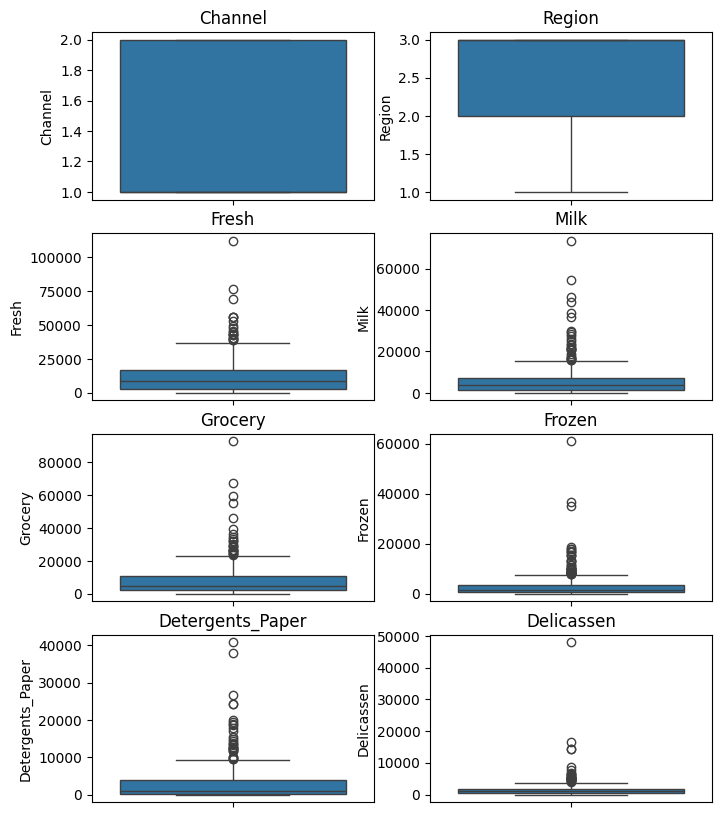

In [77]:
#identifying outliers

fig, axes = plt.subplots(4 ,2 , figsize=(8,10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
  sns.boxplot(df[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

In [78]:
#removing outliers for every column through IQR method

for col in df.columns:
  #Q1 = df[col].quantile(0.05)
  #Q3 = df[col].quantile(0.95)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



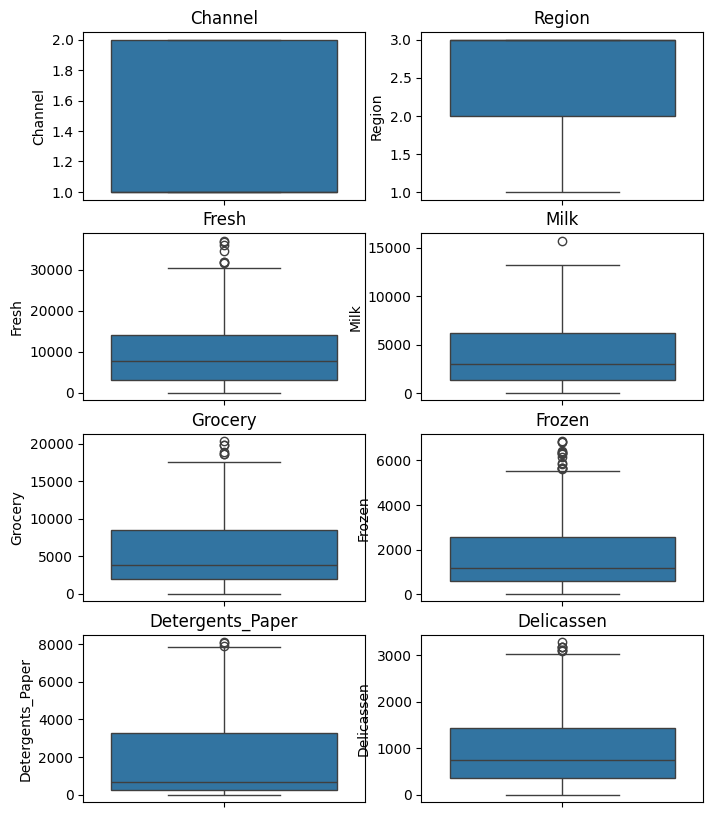

In [79]:
#after removing outliers
fig, axes = plt.subplots(4 ,2 , figsize=(8,10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
  sns.boxplot(df[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

In [80]:
#dropping Columns Channel and Region
df = df.drop(['Channel', 'Region'], axis=1)

In [81]:
#df['Channel'] = df['Channel'].map({1:0, 2:1})

In [82]:
#Applying standard scaling

from sklearn.preprocessing import StandardScaler

#numerical_columns = df.columns[1:]

scaler = StandardScaler()

df = scaler.fit_transform(df)

#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## 3. Dimensionality Reduction using PCA

**What is PCA (Principal Component Analysis)?**

PCA is a technique used to reduce the dimensionality of data while retaining as much variance (information) as possible.

How it works:
PCA finds new axes (called principal components) that are:

 * Linear combinations of original features

 * Uncorrelated with each other

 * Sorted by how much variance they capture

You can project your data onto the top k components to reduce noise and improve clustering or visualization.

PCA is widely used before clustering when you have high-dimensional data — it helps simplify and improve performance.

**What are Eigenvalues and Eigenvectors?**

These are key mathematical concepts behind PCA:

 * An eigenvector is a direction in the data space — it represents a principal component.

 * An eigenvalue tells you how important that direction is — i.e., how much variance the component explains.

In PCA:

 * The first principal component is the eigenvector with the largest eigenvalue (captures the most variance)

 * Subsequent components explain decreasing amounts of variance

You typically choose the number of components based on the explained variance ratio (e.g., keep enough components to explain >90% of the total variance).

In [83]:
#apply pca on dataset with region

from sklearn.decomposition import PCA

pca = PCA(n_components=6)

pca.fit(df)

eigen_values = pca.explained_variance_

explained_variance_ratio_ = pca.explained_variance_ratio_

print("eigen_values", eigen_values)
print("explained variance ratio", explained_variance_ratio_)


eigen_values [2.69824741 1.34945428 0.82166652 0.68880658 0.32433235 0.1364203 ]
explained variance ratio [0.44829373 0.22420179 0.13651378 0.11444009 0.05388541 0.02266522]


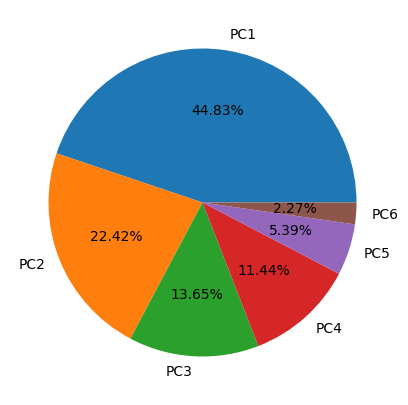

In [84]:
plt.figure(figsize=(5,5))
plt.pie(x=eigen_values, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], autopct='%.2f%%')
plt.show()

In [85]:
#now we apply transform our df to 3 main componenets with pca
pca2 = PCA(n_components = 3)

X_pca = pca2.fit_transform(df)

## 5. Clustering with KMeans

**What is KMeans Clustering?**

KMeans is a popular clustering algorithm that divides data into k clusters, where each data point belongs to the cluster with the nearest centroid (mean point).

How it works:

 * Randomly initialize k centroids.

 * Assign each point to the nearest centroid (using Euclidean distance).

 * Update the centroids based on the mean of assigned points.

 * Repeat steps 2–3 until the centroids stop moving (convergence).

KMeans tries to minimize the Within-Cluster Sum of Squares (WCSS) — the total squared distance of points from their cluster center.

Note: You must choose k beforehand, which can be guided using the elbow method or silhouette score.



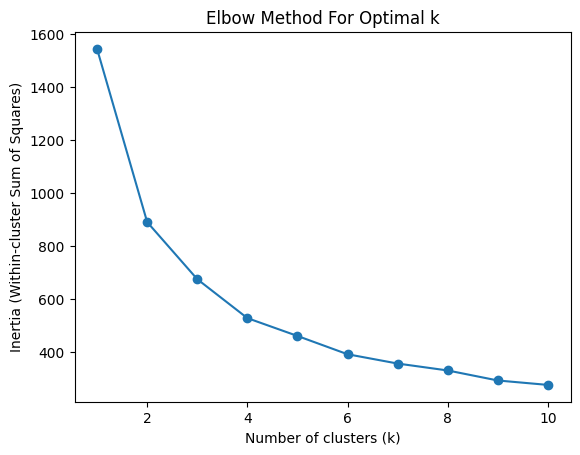

In [86]:
#finding the optimal number of clusters

from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_pca)
  inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.show()

The Elbow Method is a technique used in unsupervised learning, particularly with K-Means clustering, to determine the optimal number of clusters (K).

It involves:

* Running the K-Means algorithm for a range of K values (e.g., from 1 to 10).

* For each K, calculating a metric like the Within-Cluster Sum of Squares (WCSS), which measures the sum of squared distances between each point and its cluster's centroid.

* Plotting the WCSS values against the number of clusters (K).

* Looking for an "elbow" point on the graph. This is where the rate of decrease in WCSS sharply slows down, indicating that adding more clusters beyond this point provides diminishing returns in terms of reducing intra-cluster variance.

The K value at this elbow point is often considered the optimal number of clusters.

note: WCSS (Within-Cluster Sum of Squares) and Inertia are essentially the same metric used in K-Means clustering.


The "elbow" — where the drop in WCSS/inertia starts to level off — occurs between k=3 and k=4.

After k=3, the decrease in inertia becomes more gradual and less significant.

In [87]:
#initializing kmeans with 4 clusters after finding optimal clusters.
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

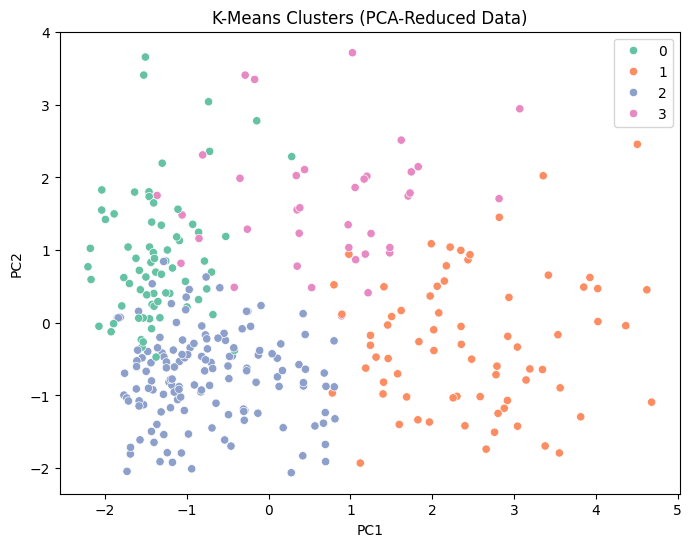

In [88]:
#plotting the clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("K-Means Clusters (PCA-Reduced Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**What is Silhouette Score?**

Silhouette Score measures the quality of clustering by evaluating how well each point lies within its own cluster vs the nearest other cluster.

Formula:
For a data point:

a = average distance to points in the same cluster

b = average distance to points in the nearest neighboring cluster

Silhouette score = (b - a) / max(a, b)

Interpretation:

1.0 → well-clustered

0.0 → overlapping clusters

< 0 → likely misclassified

Use it to compare clustering results for different values of k or different algorithms.



In [89]:
#calculating silhouette score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.3605018419567254


In [90]:
#predict a specific row function

def predict_row(row):
  row_scaled = scaler.transform(row)
  row_pca = pca2.transform(row_scaled)
  label = int(kmeans.predict(row_pca)[0])
  return label


In [91]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [92]:
sample_df = pd.DataFrame([data.iloc[5, 2:].values], columns=data.columns[2:])
print("The row belongs to cluster - ",predict_row(sample_df))

The row belongs to cluster -  3


## 6. Clustering with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points based on density rather than distance.

How it works:

Two key parameters:

* eps (maximum distance between two points to be neighbors)

* min_samples (minimum number of points required to form a dense region)

A point is:

* A core point if it has at least min_samples within eps radius

* A border point if it's near a core point but has fewer neighbors

* Noise if it's isolated

DBSCAN can:

* Automatically detect the number of clusters

* Handle arbitrary-shaped clusters

* Identify and label outliers (noise points)

DBSCAN uses nearest neighbors (within a distance ϵ) to identify "core points" (dense regions) and expand clusters from them, allowing it to find arbitrary-shaped clusters and detect noise.

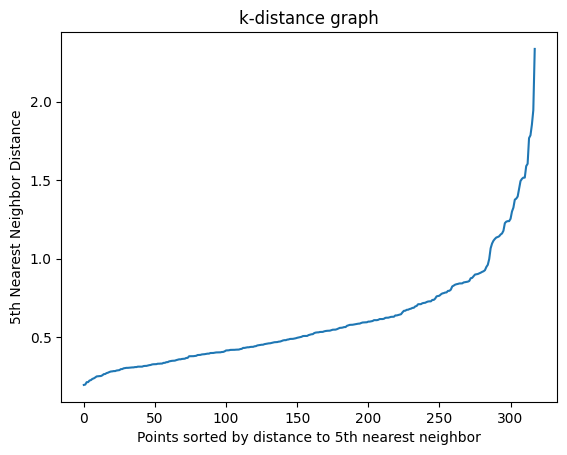

In [93]:
from sklearn.neighbors import NearestNeighbors

#using nearest neighnours to iddentify core points

nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(X_pca)
distances, _ = neighbors.kneighbors(X_pca)

distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance to 5th nearest neighbor")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


The elbow appears around:

eps ≈ 1.0 to 1.4

After that, the slope increases sharply, suggesting a shift from core points to more isolated points.


In [94]:
from sklearn.cluster import DBSCAN

#initializing dbscan with optimal eps value

db = DBSCAN(eps=1.4, min_samples=5)
clusters_db = db.fit_predict(X_pca)

In [95]:
#finding the number of clusters
np.unique(clusters_db)

array([-1,  0])

In [96]:
#finding silhoutte score
score2 = silhouette_score(X_pca, clusters_db)
print("Silhouette Score:", score2)

Silhouette Score: 0.40139664257566576


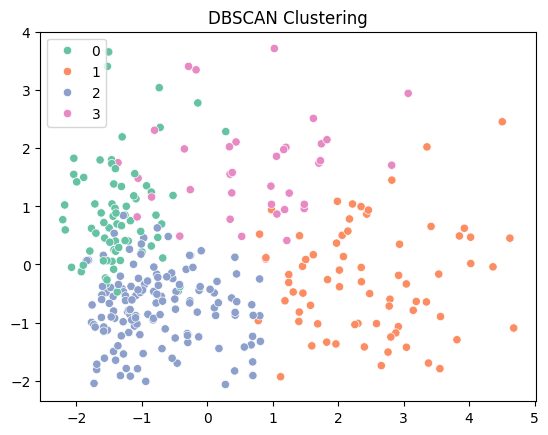

In [97]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


## 7. Conclusion

With a silhouette score of 0.40, DBSCAN shows a marginal improvement over K-Means' 0.36 in our dataset. This suggests DBSCAN formed slightly better-defined and separated clusters. While both scores indicate room for improvement, DBSCAN appears to be the preferred choice based on this metric.